In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zomato=pd.read_csv("E://zomato.csv")
zomato.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [3]:
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
zomato.drop(['url','dish_liked','phone'],axis=1,inplace=True)


In [5]:
zomato.duplicated().sum()

43

In [6]:
zomato.drop_duplicates(inplace=True)

In [7]:
zomato.isnull()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51713,False,False,False,False,True,False,False,False,False,False,False,False,False,False
51714,False,False,False,False,True,False,False,False,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [9]:
zomato.dropna(how='any',inplace=True)

In [10]:
zomato1=zomato

In [11]:
zomato1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [12]:
zomato1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
zomato1=zomato1.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type'})

In [14]:
zomato1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'listed_in(city)'],
      dtype='object')

In [15]:
zomato1['cost']=zomato1['cost'].astype(str)
zomato1['cost']=zomato1['cost'].apply(lambda x:x.replace(',','.'))
zomato1['cost']=zomato1['cost'].astype(float)


In [16]:
zomato1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          43499 non-null  object 
 1   name             43499 non-null  object 
 2   online_order     43499 non-null  object 
 3   book_table       43499 non-null  object 
 4   rate             43499 non-null  object 
 5   votes            43499 non-null  int64  
 6   location         43499 non-null  object 
 7   rest_type        43499 non-null  object 
 8   cuisines         43499 non-null  object 
 9   cost             43499 non-null  float64
 10  reviews_list     43499 non-null  object 
 11  menu_item        43499 non-null  object 
 12  type             43499 non-null  object 
 13  listed_in(city)  43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [17]:
zomato1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
zomato1=zomato1.loc[zomato1.rate!='NEW']
zomato1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
zomato1=zomato1.loc[zomato1.rate!='-'].reset_index(drop=True)
zomato1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
remove=lambda x:x.replace('/5','') if type(x)==np.str else x 
zomato1.rate=zomato1.rate.apply(remove).str.strip().astype(float)

In [21]:
zomato1['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [22]:
zomato1.name=zomato1.name.apply(lambda x:x.title())
zomato1.name

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
41232                           The Farm House Bar N Grill
41233                                              Bhagini
41234    Best Brews - Four Points By Sheraton Bengaluru...
41235    Chime - Sheraton Grand Bengaluru Whitefield Ho...
41236                         The Nest - The Den Bengaluru
Name: name, Length: 41237, dtype: object

In [23]:
zomato1.online_order

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
41232     No
41233     No
41234     No
41235     No
41236     No
Name: online_order, Length: 41237, dtype: object

zomato1.online_order.replace(('Yes','No'),(True,False),inplace=True)


In [24]:
zomato1.online_order

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
41232     No
41233     No
41234     No
41235     No
41236     No
Name: online_order, Length: 41237, dtype: object

In [25]:
zomato1.book_table.replace(('Yes','No'),(True,False),inplace=True)
zomato1.book_table

0         True
1        False
2        False
3        False
4        False
         ...  
41232    False
41233    False
41234    False
41235     True
41236    False
Name: book_table, Length: 41237, dtype: bool

In [26]:
zomato1.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [27]:
zomato1.columns[~zomato1.columns.isin(['rate','cost','votes'])]

Index(['address', 'name', 'online_order', 'book_table', 'location',
       'rest_type', 'cuisines', 'reviews_list', 'menu_item', 'type',
       'listed_in(city)'],
      dtype='object')

In [28]:
zomato1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'listed_in(city)'],
      dtype='object')

In [29]:
zomato['online_order'].factorize()[1]

Index(['Yes', 'No'], dtype='object')

In [30]:
zomato['online_order'].factorize()

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['Yes', 'No'], dtype='object'))

In [31]:
def Encode(zomato):
    for column in zomato1.columns[~zomato1.columns.isin(['rate','cost','votes'])]:
        zomato[column]=zomato[column].factorize()[0]
    return zomato
zomato_en=Encode(zomato1.copy())    

<AxesSubplot:>

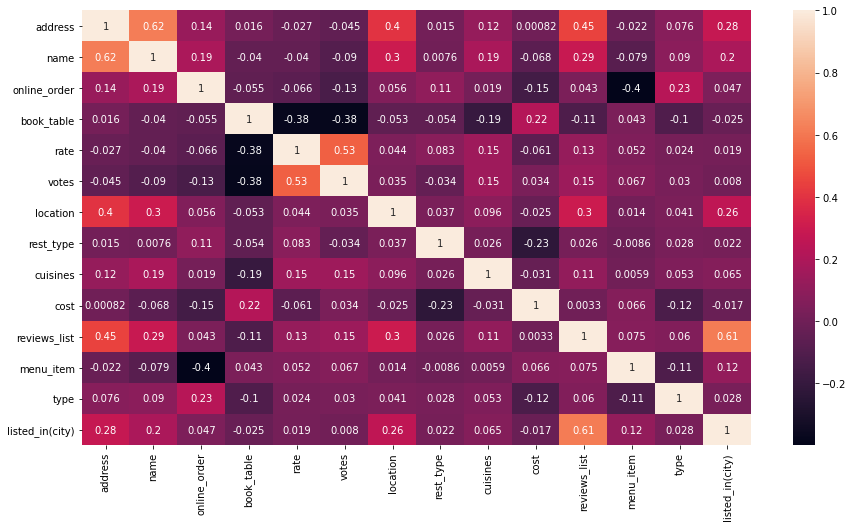

In [32]:
corr=zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [33]:
zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,listed_in(city)
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


In [34]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11,12]]
y=zomato_en['rate']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item,type
16950,0,1,0,8,2,5,250.0,0,4
767,0,1,131,8,4,278,400.0,190,1
6750,0,1,137,45,2,1295,250.0,0,2
9471,0,1,74,16,0,537,1.0,0,2
25162,0,1,61,12,2,1860,350.0,0,4


In [35]:
#regression analysis

In [36]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred=reg.predict(x_test)

In [38]:
y_test

11346    3.5
11326    4.0
37469    4.1
25963    4.0
31170    3.4
        ... 
22644    3.5
25953    3.1
29469    4.0
20735    3.5
8750     4.3
Name: rate, Length: 4124, dtype: float64

In [39]:
reg.score(x_test,y_test)

0.2737399177523221

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=105)
x_train.head()
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(min_samples_leaf=0.0001)
reg.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [41]:
reg.score(x_test,y_test)

0.8402564787002078

In [42]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100,random_state=329,min_samples_leaf=0.0001)
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8738784998882122

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
reg=ExtraTreesRegressor(n_estimators=100)
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.928846722024814

In [44]:
###Data Visualisation

In [45]:
#resturant delivering online or not

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


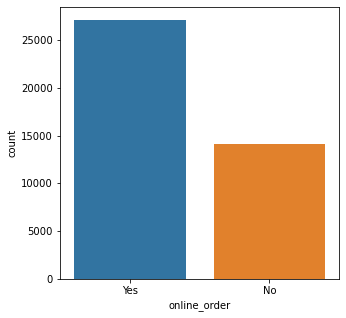

In [46]:
sns.countplot(zomato1['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


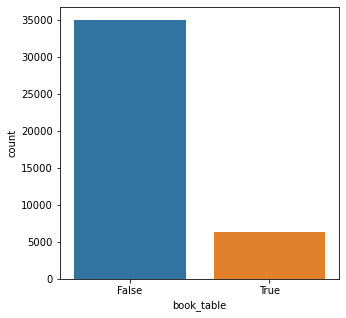

In [47]:
sns.countplot(zomato1['book_table'])
fig=plt.gcf()
fig.set_size_inches(5,5)

In [48]:
plt.rcParams['figure.figsize']=(13,9)
a=pd.crosstab(zomato1['rate'],zomato1['book_table'])

In [49]:
a.head()

book_table,False,True
rate,,
1.8,5,0
2.0,11,0
2.1,24,0
2.2,13,13
2.3,51,0


In [53]:
a.sum(1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      66.0
2.5     100.0
2.6     249.0
2.7     303.0
2.8     580.0
2.9     801.0
3.0     990.0
3.1    1550.0
3.2    1844.0
3.3    2272.0
3.4    2444.0
3.5    2763.0
3.6    3286.0
3.7    3807.0
3.8    3816.0
3.9    3954.0
4.0    3144.0
4.1    2925.0
4.2    2154.0
4.3    1682.0
4.4    1146.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

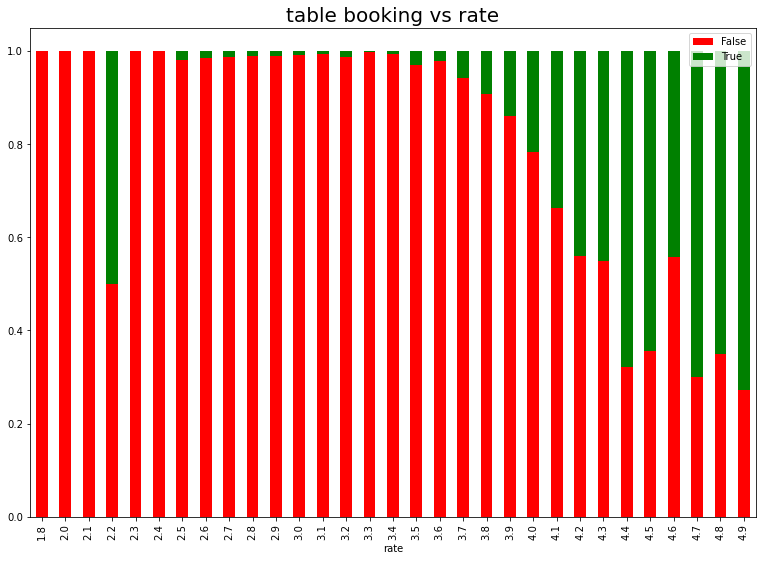

In [62]:
a.div(a.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['red','green'])
plt.title('table booking vs rate', fontweight = 100, fontsize = 20)
plt.legend(loc="upper right")

In [66]:
zomato1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='listed_in(city)', ylabel='count'>

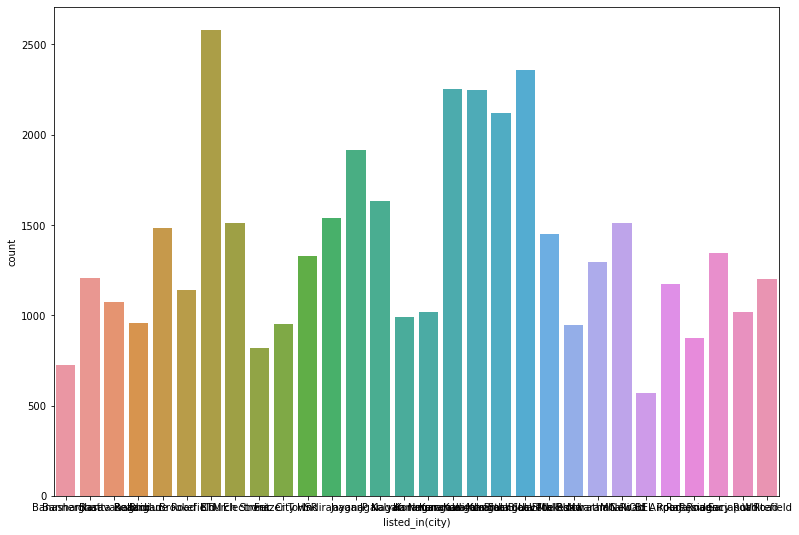

In [67]:
sns.countplot(zomato1['listed_in(city)'])

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


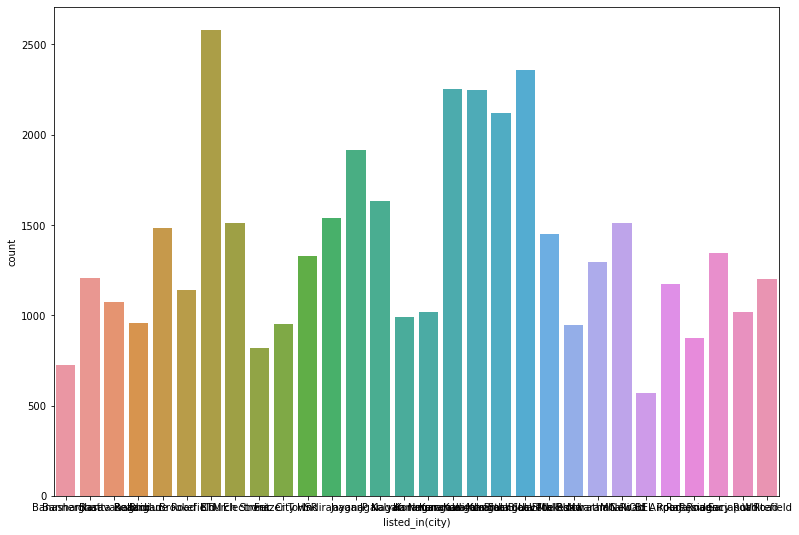

In [69]:
b=sns.countplot(zomato1['listed_in(city)']).get_xticklabels()

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location')

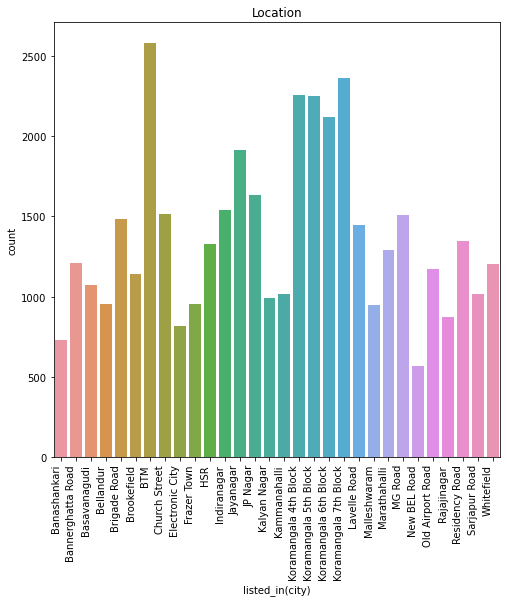

In [75]:
sns.countplot(zomato1['listed_in(city)']).set_xticklabels(b,rotation=90,ha='right')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Location')

In [83]:
loc_plt=pd.crosstab(zomato1['rate'],zomato1['listed_in(city)'])
loc_plt


listed_in(city),BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
rate,,,,,,,,,,,,,,,,,,,,,
1.8,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2.0,0,0,0,0,0,2,0,2,0,0,...,1,2,0,2,0,0,0,2,0,0
2.1,0,0,0,0,2,1,4,1,0,1,...,1,1,0,6,0,0,0,0,3,0
2.2,2,0,2,0,1,3,3,3,0,1,...,2,3,0,0,0,0,0,2,0,0
2.3,4,0,3,0,4,1,2,1,0,0,...,2,1,2,2,0,0,2,3,4,0
2.4,2,0,5,0,1,0,6,0,2,1,...,0,0,2,8,0,9,2,0,1,0
2.5,6,3,2,3,1,4,0,4,5,2,...,5,4,2,1,3,3,0,4,1,9
2.6,19,4,12,7,9,4,15,3,2,2,...,5,6,5,17,4,3,2,7,7,11
2.7,20,6,16,11,4,7,12,9,11,8,...,5,9,12,10,6,9,7,3,12,11


<AxesSubplot:xlabel='rate'>

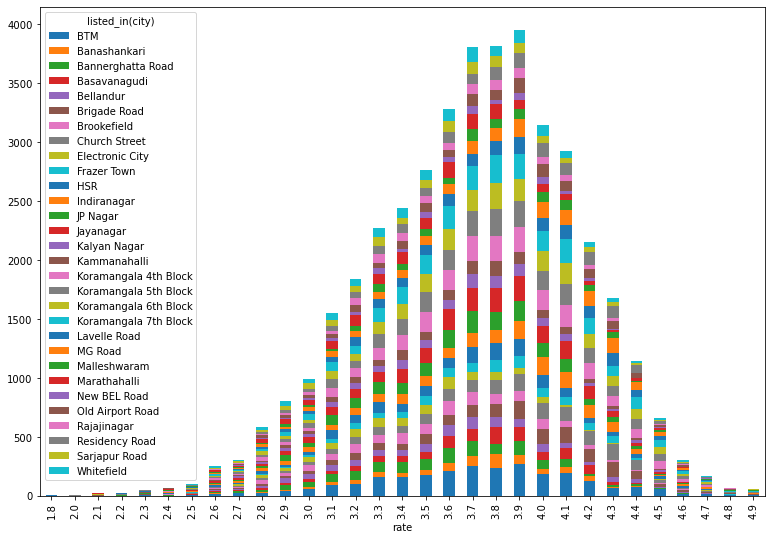

In [82]:
loc_plt.plot(kind='bar',stacked=True)

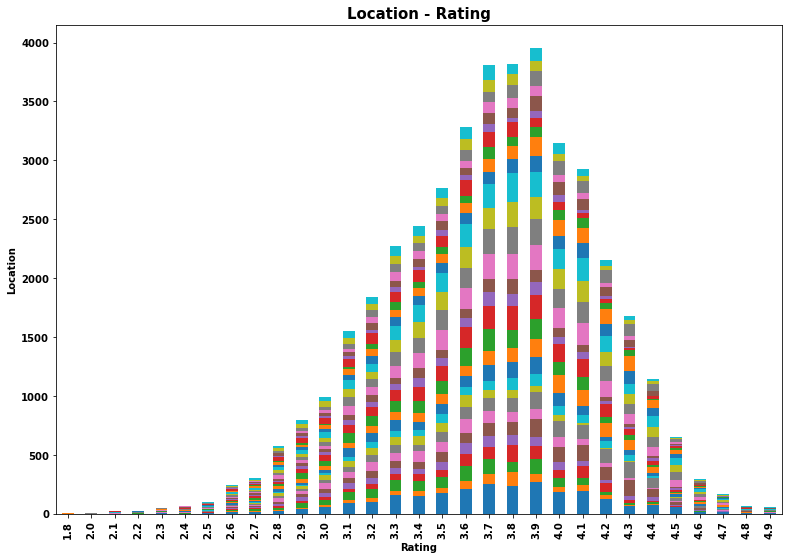

In [85]:
loc_plt.plot(kind='bar',stacked=True)
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove()

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'resturant type')

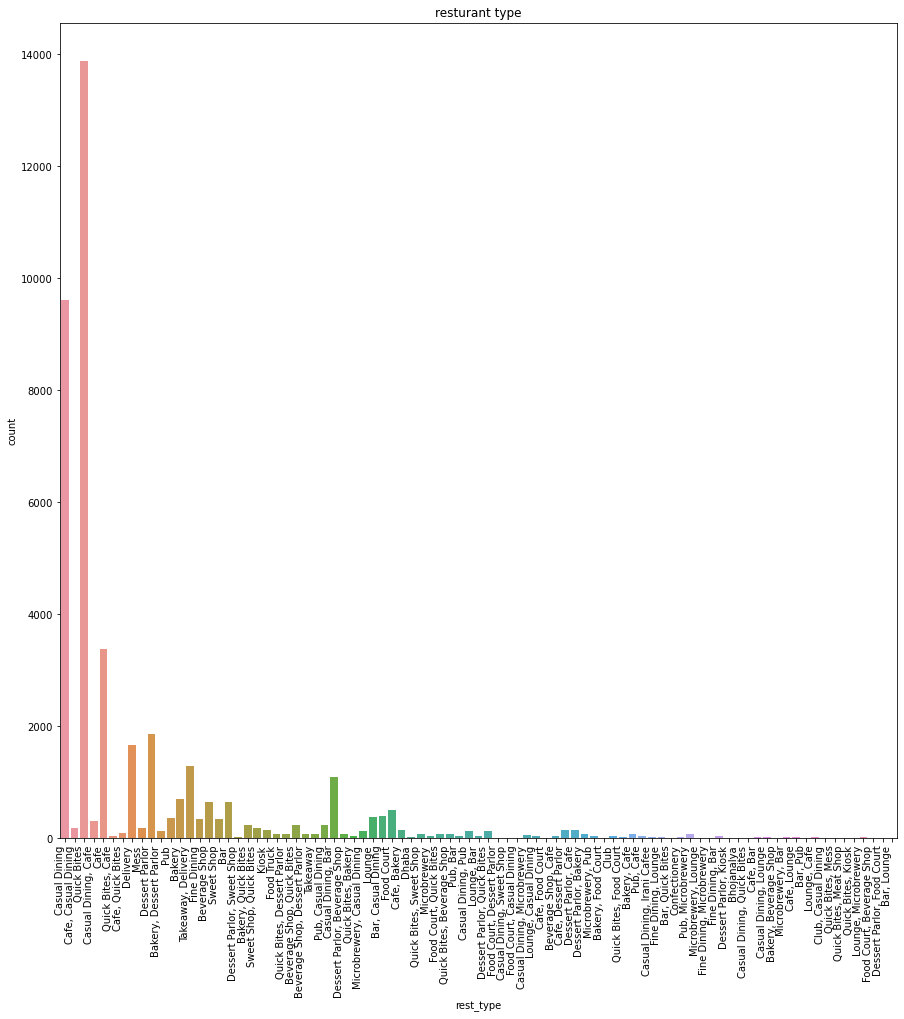

In [88]:
sns.countplot(zomato1['rest_type']).set_xticklabels(sns.countplot(zomato1['rest_type']).get_xticklabels(),rotation=90,ha='right')
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('resturant type')

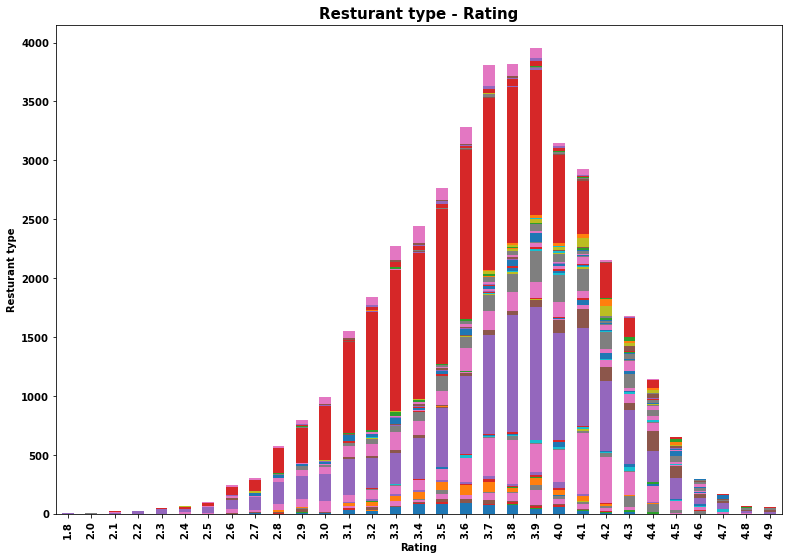

In [94]:
loc_plt=pd.crosstab(zomato1['rate'],zomato1['rest_type'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Resturant type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Resturant type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove()

C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'type of services')

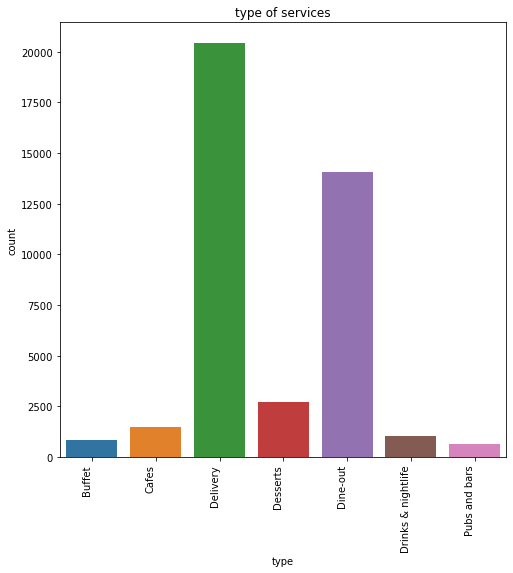

In [98]:
sns.countplot(zomato1['type']).set_xticklabels(sns.countplot(zomato1['type']).get_xticklabels(),rotation=90,ha='right')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('type of services')

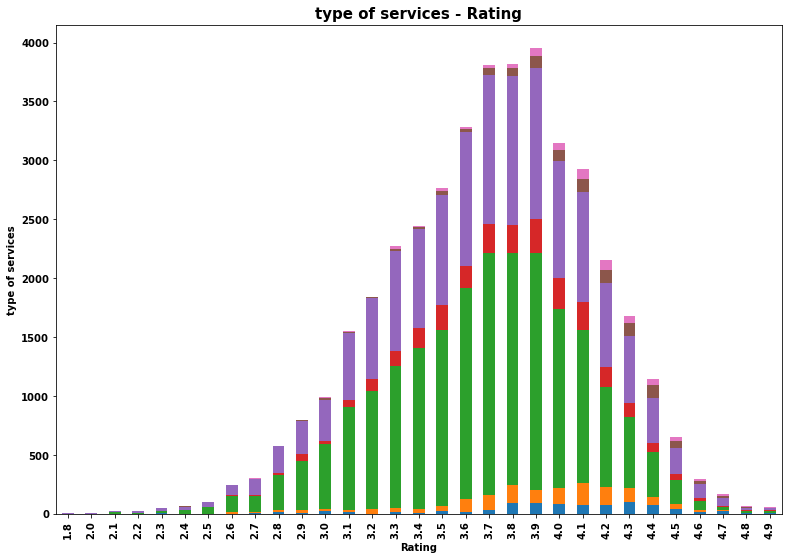

In [99]:
loc_plt=pd.crosstab(zomato1['rate'],zomato1['type'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('type of services - Rating',fontsize=15,fontweight='bold')
plt.ylabel('type of services',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove()

In [102]:
zomato1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nazim Islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'cost of restaurant')

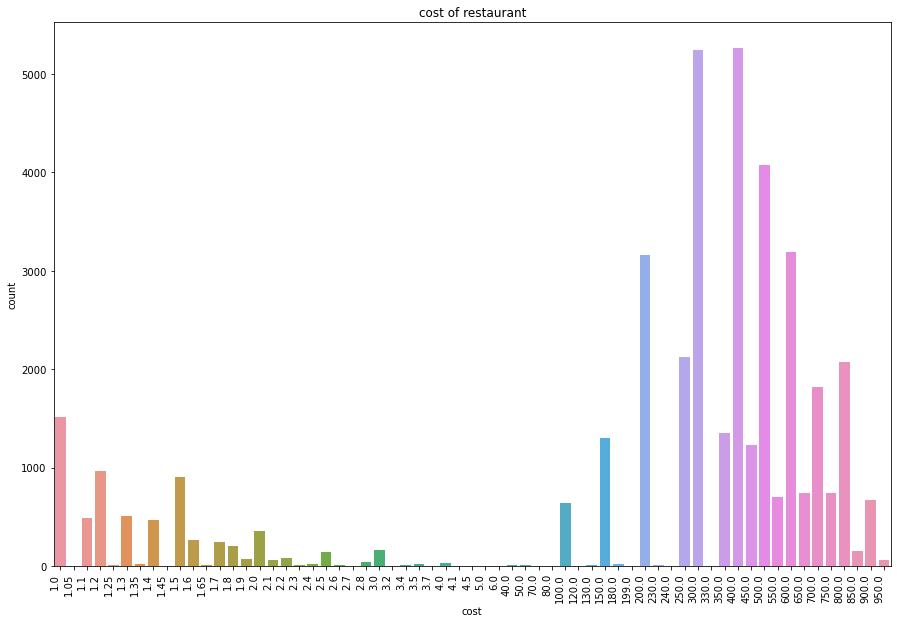

In [104]:
sns.countplot(zomato1['cost']).set_xticklabels(sns.countplot(zomato1['cost']).get_xticklabels(),rotation=90,ha='right')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('cost of restaurant')

Text(0.5, 1.0, 'NO of rest')

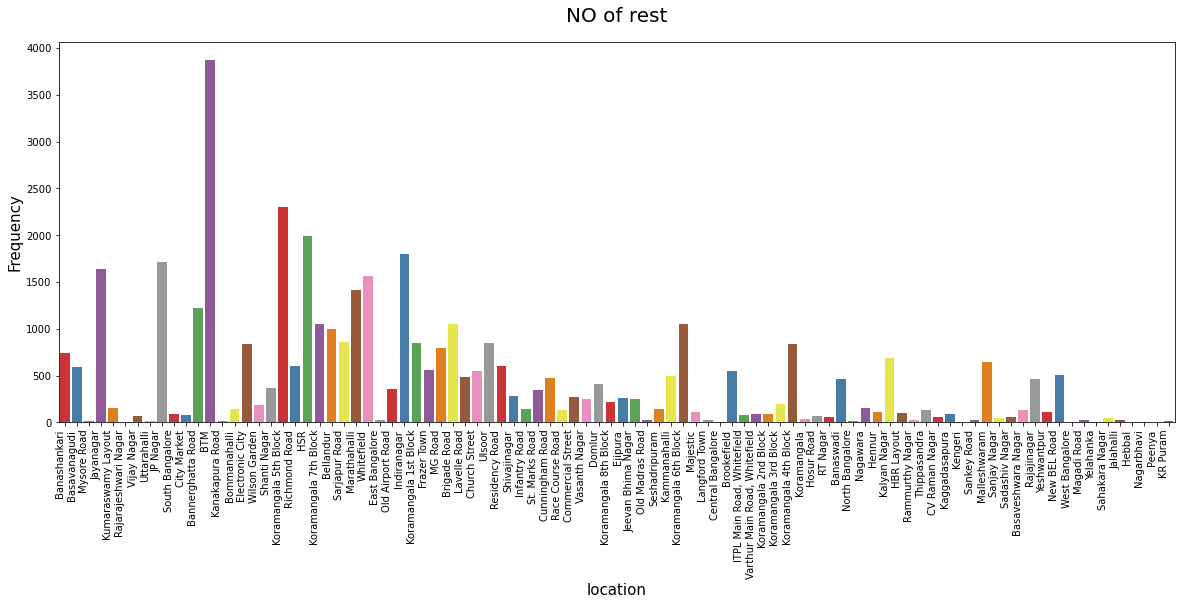

In [115]:
plt.figure(figsize=(20,7))
f=sns.countplot(x='location',data=zomato1,palette='Set1')
f.set_xticklabels(f.get_xticklabels(),rotation=90,ha='right')
plt.ylabel('Frequency',size=15)
plt.xlabel('location',size=15)
f
plt.title('NO of rest',size=20,pad=20)

Text(0.5, 1.0, 'Restaurant_types')

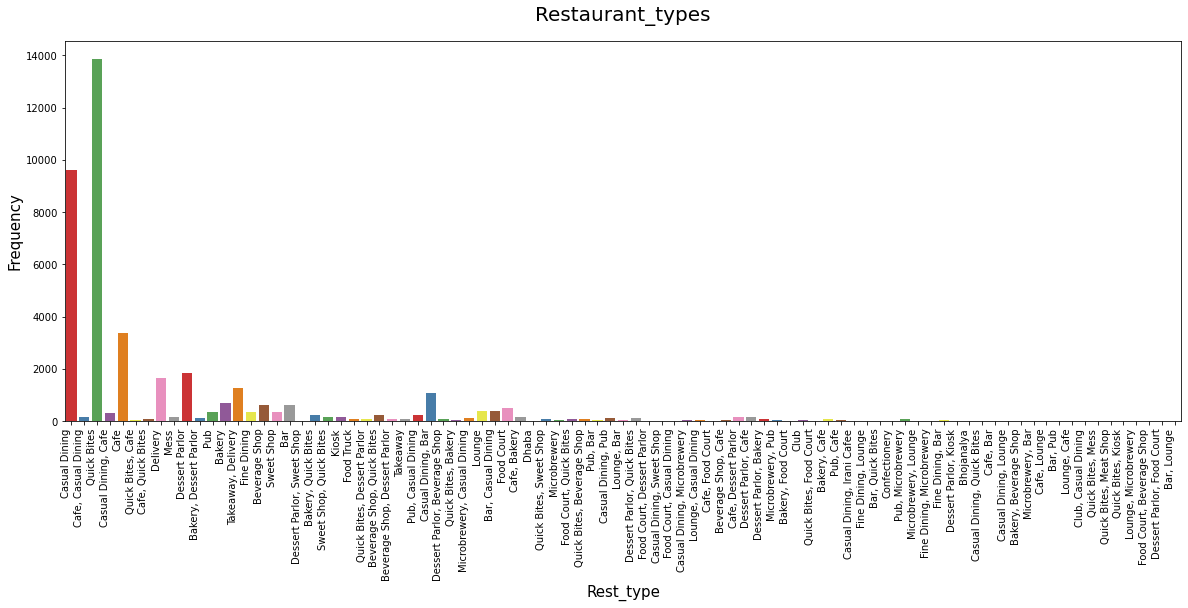

In [116]:
plt.figure(figsize=(20,7))
f=sns.countplot(x='rest_type',data=zomato1,palette='Set1')
f.set_xticklabels(f.get_xticklabels(),rotation=90,ha='right')
plt.ylabel('Frequency',size=15)
plt.xlabel('Rest_type',size=15)
f
plt.title('Restaurant_types',size=20,pad=20)

In [120]:
chains=zomato1['name'].value_counts()[:20]#first 20 famous
chains

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Kanti Sweets         68
Just Bake            68
Five Star Chicken    68
Baskin Robbins       62
Kfc                  60
Pizza Hut            60
Petoo                60
Mcdonald'S           59
Subway               59
Smoor                59
Domino'S Pizza       59
Polar Bear           58
Sweet Truth          58
Faasos               56
Beijing Bites        56
Burger King          55
Keventers            54
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

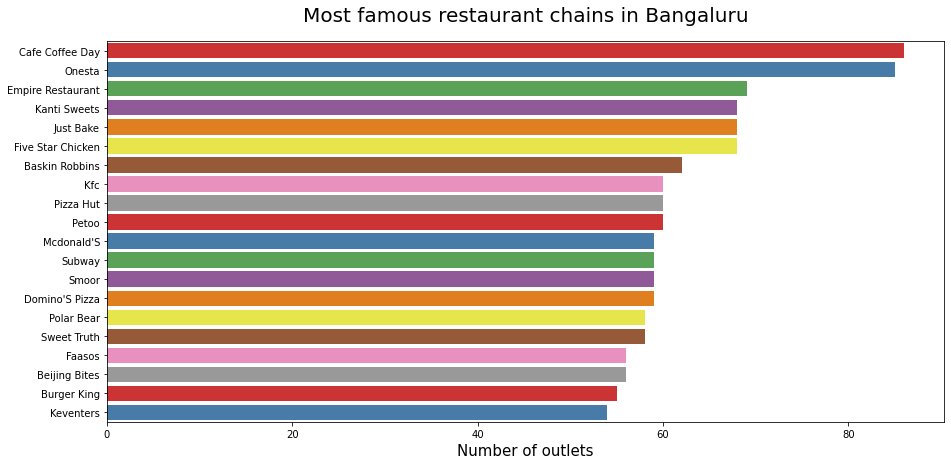

In [126]:
plt.figure(figsize=(15,7))
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)